In [3]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud

In [4]:
!wget https://lazyprogrammer.me/course_files/spam.csv

--2022-12-08 09:46:54--  https://lazyprogrammer.me/course_files/spam.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.21.23.210, 2606:4700:3030::ac43:d5a6, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 503663 (492K) [text/csv]
Saving to: ‘spam.csv’

spam.csv            100%[===================>] 491.86K   521KB/s    in 0.9s    

2022-12-08 09:46:56 (521 KB/s) - ‘spam.csv’ saved [503663/503663]



In [5]:
#this file contains some invalid chars depending on which version of pandas you have

df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [6]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [7]:
df = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)

In [8]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
df.columns = ['labels', 'data']

In [10]:
df.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


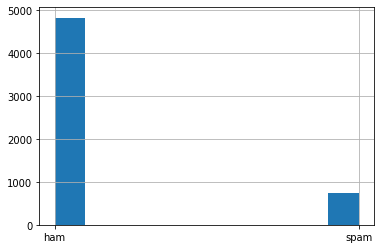

In [11]:
df['labels'].hist()

In [12]:
#creating binary labels

df['b_labels'] = df['labels'].map({'ham': 0, 'spam': 1})
Y = df['b_labels'].to_numpy()

In [13]:
#split up the data

df_train, df_test, Ytrain, Ytest = train_test_split(
    df['data'], Y, test_size = 0.33
)

In [14]:
featurizer = CountVectorizer(decode_error='ignore')
Xtrain = featurizer.fit_transform(df_train)
Xtest = featurizer.transform(df_test)

In [15]:
Xtrain

<3733x6818 sparse matrix of type '<class 'numpy.int64'>'
	with 48844 stored elements in Compressed Sparse Row format>

In [16]:
#create the model, training it and printing scores

model = MultinomialNB()
model.fit(Xtrain, Ytrain)
print("Train acc:", model.score(Xtrain,Ytrain))
print("Test acc:", model.score(Xtest,Ytest))

Train acc: 0.9927672113581569
Test acc: 0.9869494290375204


In [17]:
Ptrain = model.predict(Xtrain)
Ptest = model.predict(Xtest)
print("Train F1:", f1_score(Ytrain, Ptrain))
print("Test F1:",f1_score(Ytest, Ptest))

Train F1: 0.9720785935884179
Test F1: 0.9523809523809523


In [18]:
Prob_train = model.predict_proba(Xtrain)[:,1]
Prob_test = model.predict_proba(Xtest)[:,1]
print("train AUC:", roc_auc_score(Ytrain, Prob_train))
print("Test AUC:",roc_auc_score(Ytest,Prob_test))


train AUC: 0.9921821718154034
Test AUC: 0.9915925419089975


In [19]:
cm = confusion_matrix(Ytrain,Ptrain)
cm

array([[3236,    9],
       [  18,  470]])

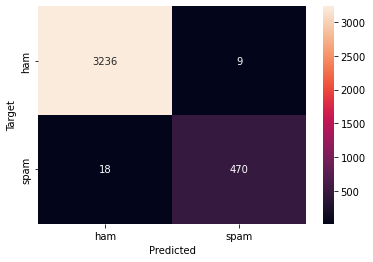

In [20]:
def plot_cm(cm):
  classes = ['ham','spam']
  df_cm = pd.DataFrame(cm, index=classes, columns=classes)
  ax = sn.heatmap(df_cm, annot = True, fmt='g')
  ax.set_xlabel("Predicted")
  ax.set_ylabel("Target")

plot_cm(cm)   

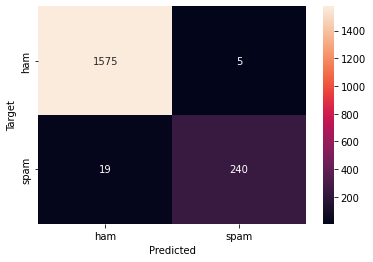

In [21]:
cm_test = confusion_matrix(Ytest, Ptest)
plot_cm(cm_test)

In [22]:
#visualizing the data
def visualize(label):
  words = ''
  for msg in df[df['labels'] == label]['data']:
    msg = msg.lower()
    words += msg + ' '
  wordcloud = WordCloud(width = 600, height = 400).generate(words)
  plt.imshow(wordcloud)
  plt.axis('off')
  plt.show()  

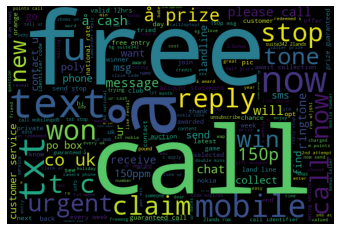

In [23]:
visualize('spam')

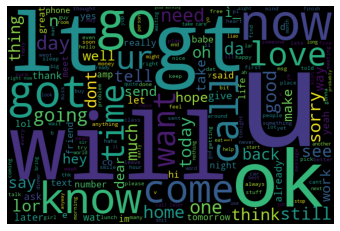

In [24]:
visualize('ham')

In [27]:
#let's what we are getting wrong
X = featurizer.transform(df['data'])
df['predictions'] = model.predict(X)

In [28]:
#things that should be a spam
sneaky_spam = df[(df['predictions'] == 0) & (df['b_labels'] == 1)]['data']
for msg in sneaky_spam:
  print(msg)

FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv
Did you hear about the new \Divorce Barbie\"? It comes with all of Ken's stuff!"
Hi I'm sue. I am 20 years old and work as a lapdancer. I love sex. Text me live - I'm i my bedroom now. text SUE to 89555. By TextOperator G2 1DA 150ppmsg 18+
Do you realize that in about 40 years, we'll have thousands of old ladies running around with tattoos?
Talk sexy!! Make new friends or fall in love in the worlds most discreet text dating service. Just text VIP to 83110 and see who you could meet.
Hello. We need some posh birds and chaps to user trial prods for champneys. Can i put you down? I need your address and dob asap. Ta r
How about getting in touch with folks waiting for company? Just txt back your NAME and AGE to opt in! Enjoy the community (150p/SMS)
Filthy stories and GIRLS waiting for your
CLAIRE here am havin borin time & am now alone U wann

In [29]:
#things that should not be spam
not_spam = df[(df['predictions'] == 1) & (df['b_labels'] == 0)]['data']
for msg in not_spam:
  print(msg)

Finally the match heading towards draw as your prediction.
Are you free now?can i call now?
Waiting for your call.
Can u get pic msgs to your phone?
We have sent JD for Customer Service cum Accounts Executive to ur mail id, For details contact us
Hey...Great deal...Farm tour 9am to 5pm $95/pax, $50 deposit by 16 May
Unlimited texts. Limited minutes.
Mathews or tait or edwards or anderson
Gettin rdy to ship comp
I liked the new mobile
Anytime...
I (Career Tel) have added u as a contact on INDYAROCKS.COM to send FREE SMS. To remove from phonebook - sms NO to  &lt;#&gt;
Nokia phone is lovly..
We have sent JD for Customer Service cum Accounts Executive to ur mail id, For details contact us
